In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings

In [14]:
df_machine = pd.read_pickle('df_machine.pkl')

In [15]:
def elbow_method(df):
    """
    This function calculate the sum of squared distances for each k value and plots graph
    :arg:
        df: dataframe with all the data.
    :returns:
        The function does not have a return. It saves the plot inside the plots folder.
    """
    k_values = list(range(2, 19))
    sse = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        
        #Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=sse, mode='lines+markers'))
    fig.update_layout(
        title='Elbow Method',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Sum of Squared Distances'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(df):
    # Perform K-Means clustering with different values of k
    k_values = range(1, 11)
    inertias = []
    
    for k in k_values:
        km = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly to avoid warning
        km.fit(df)
        inertias.append(km.inertia_)
    
    # Plotting the elbow curve
    plt.plot(k_values, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    
    # Display the chart
    fig.show()

In [17]:
def silhouette_plot(df):
    """
    Generate an interactive line chart of Silhouette Coefficient vs. Number of Clusters using Plotly.

    :Args:
    df: (pandas DataFrame): The input data.
    """
    k_values = list(range(2, 19))
    silhouette_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

        # Calculate the Silhouette Coefficient for the clustering result
        silhouette_coefficient = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_coefficient)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=k_values, y=silhouette_scores, mode='lines+markers'))
    fig.update_layout(
        title='Silhouette Coefficient vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Silhouette Coefficient'),
        showlegend=False,
        template='plotly_white'
    )

    # Display the chart
    fig.show()

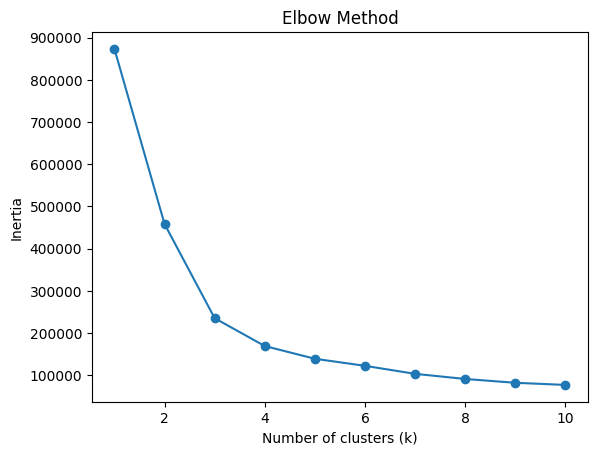

NameError: name 'fig' is not defined

In [18]:
elbow_method(df_machine)

In [ ]:
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Call silhouette_plot with df_machine
silhouette_plot(df_machine)

In [ ]:
# Initializing
pca = PCA(n_components=None) #Number of components to keep. if n_components is not set all components are kept

pca.fit(iris.drop(columns="species"))

# Calculating variance
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

# Plotting
plt.bar(range(1, 5), exp_var, align='center',label='Individual explained variance') #bars
plt.step(range(1, 5), cum_exp_var, where='mid', label='Cumulative explained variance', color='red') #line

# Axis
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
apply_pca(df_machine,7)

In [ ]:
def davies_boulding_plot(df):
    """
    Generate an interactive line chart of Davies-Bouldin Index vs. Number of Clusters using Plotly.
    :Args:
    df (pandas DataFrame): The input data.
    """
    
    k_values = list(range(2, 19))
    davies_bouldin_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

#Calculate the Davies-Bouldin Index for the clustering result
        davies_bouldin_index = davies_bouldin_score(df, cluster_labels)
        davies_bouldin_scores.append(davies_bouldin_index)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=davies_bouldin_scores, mode='lines+markers'))
    fig.update_layout(
        title='Davies-Bouldin Index vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (K)'),
        yaxis=dict(title='Davies-Bouldin Index'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [ ]:
davies_boulding_plot(df_machine)

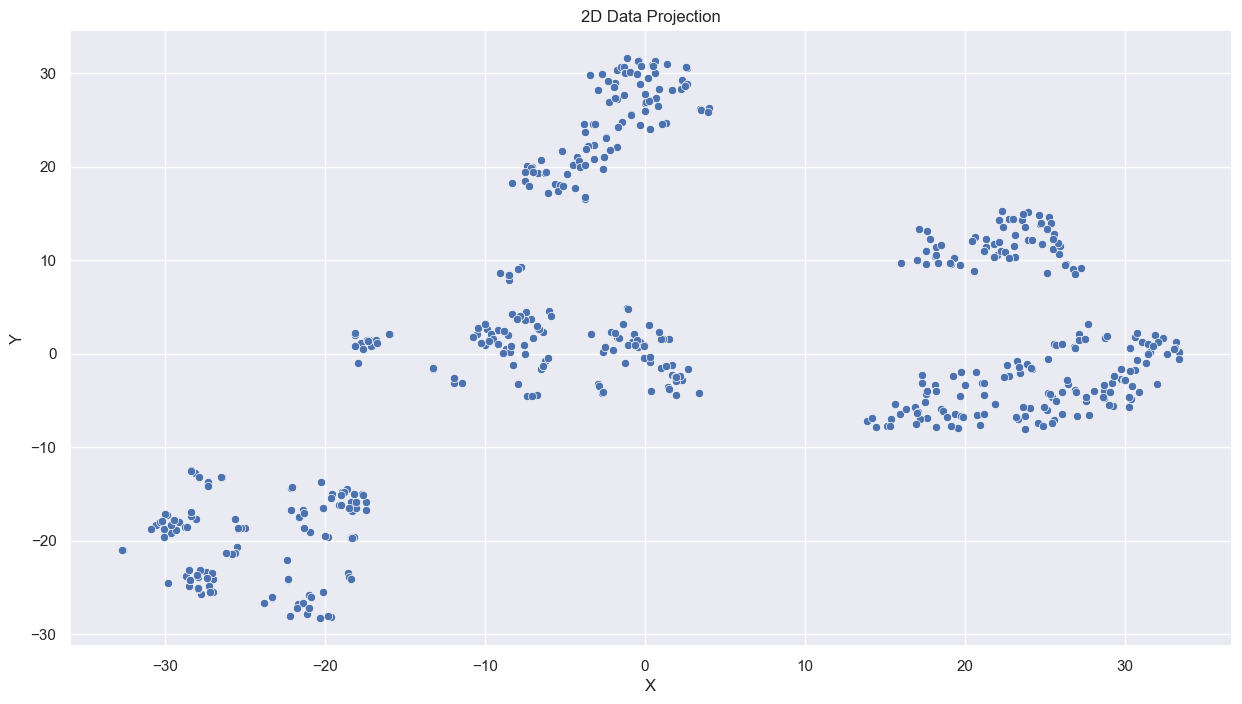

In [19]:
#Instantiating TSNE
tsne = TSNE(n_components=2, random_state=42)


tsne_df = pd.DataFrame(tsne.fit_transform(df_machine), columns = ['X', 'Y'] )

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x= 'X', y= 'Y',data= tsne_df).set(title= '2D Data Projection');

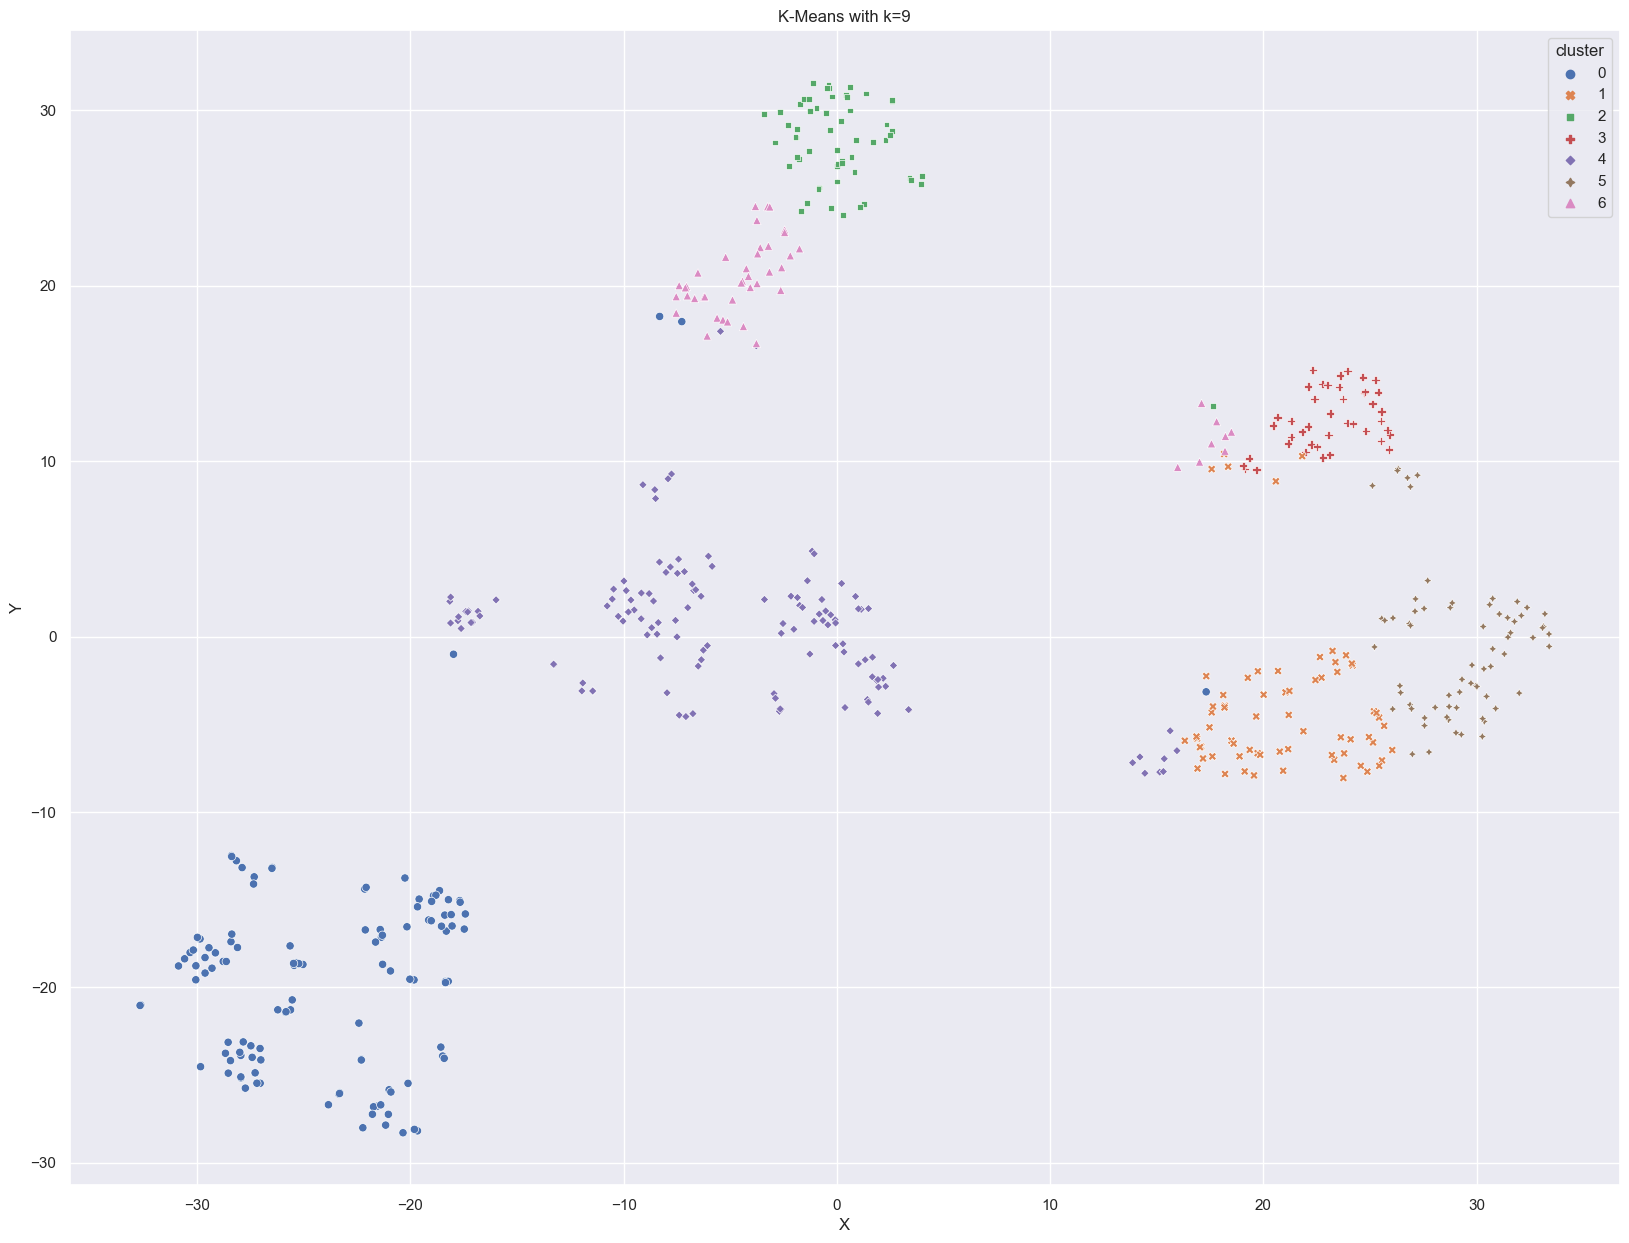

In [20]:
km = KMeans(n_clusters = 7).fit(df_machine)
tsne_df['cluster'] = pd.Categorical(km.labels_)

sns.set(rc = {'figure.figsize':(20,15)})
sns.scatterplot(x='X', y='Y', hue='cluster', style='cluster', data= tsne_df).set(title= 'K-Means with k=9');

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Ejecutar el algoritmo K-Means con n_init explícito
kmeans = KMeans(n_clusters=7, n_init=10).fit(df_machine)

# Agregar las etiquetas de clúster al DataFrame tsne_df
tsne_df['cluster'] = pd.Categorical(kmeans.labels_)

# Crear un diccionario para almacenar los DataFrames de cada clúster
cluster_dataframes = {}

# Iterar sobre cada clúster y crear el DataFrame correspondiente
for cluster in range(9):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_dataframes[cluster] = df_machine.iloc[cluster_indices]

# Acceder a un DataFrame específico de un clúster
cluster_6_df = cluster_dataframes[6]

In [22]:
value_counts_dict = {}
for column in cluster_0_df.columns:
    value_counts_dict[column] = cluster_0_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

NameError: name 'cluster_0_df' is not defined